In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrices import confusion_matrix , classification_report
from sklearn.preprocessing import label_binarize



from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
final_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0']

data_final = data_encoded[final_features]


data_final_encoded = data_final

num_columns_final = [col for col in data_final_encoded.columns if col in num_columns]

scaler_final = StandardScaler()
data_final_scaled = data_final_encoded.copy()
data_final_scaled[num_columns_final] = scaler_final.fit_transform(data_final_scaled[num_columns_final])

x = data_final_scaled
y = data['target']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x ,y ,test_size=0.2 , random_state=42)

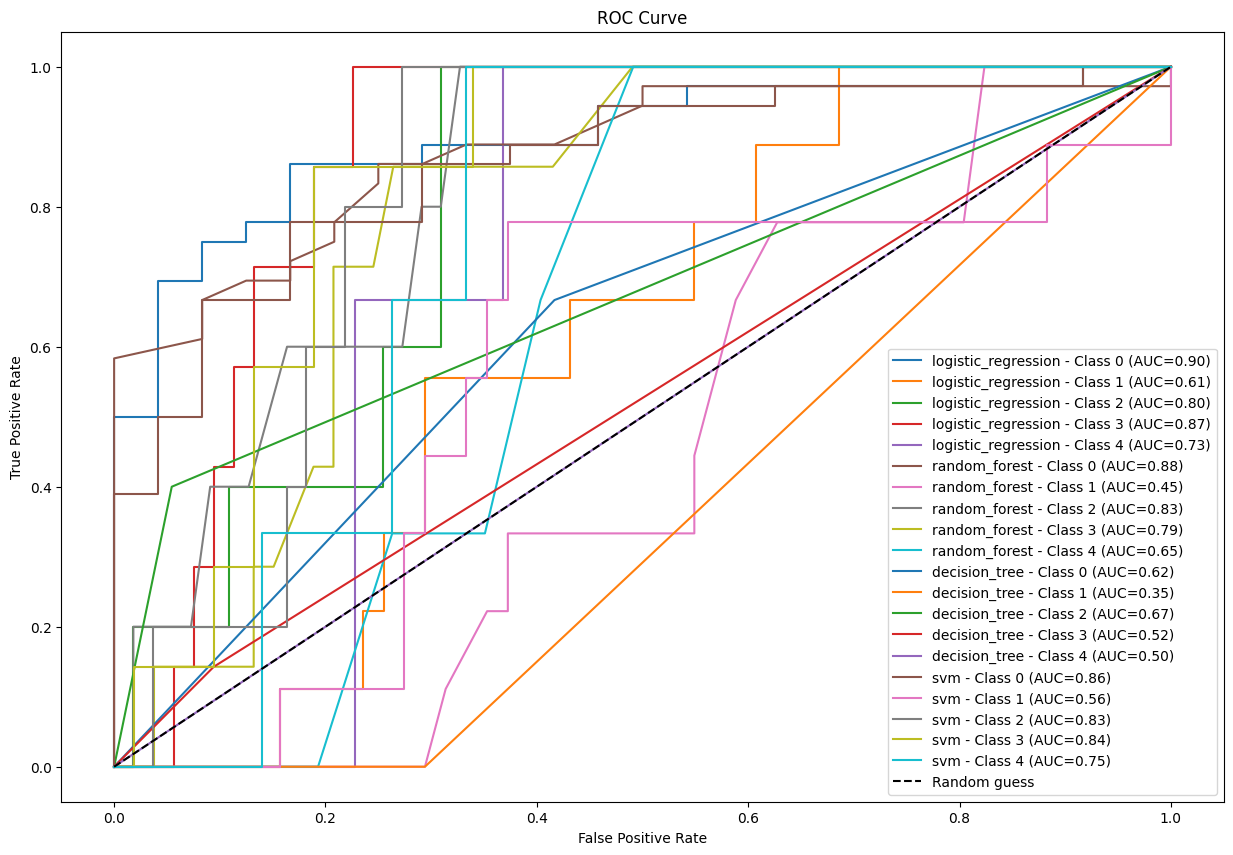

In [ ]:
 models = {
     "logistic_regression": LogisticRegression(max_iter=5000),
     "random_forest": RandomForestClassifier() ,
     "decision_tree": DecisionTreeClassifier(),
     "svm": SVC(probability=True)
 }

 results = []



 plt.figure(figsize=(15,10))


 for model_name ,clf in models.items():
     clf.fit(x_train , y_train)
     y_pred =clf.predict(x_test)
     y_prob =clf.predict_proba(x_test)

     classes = np.unique(y_test)
     y_test_bin = label_binarize(y_test , classes = classes)
     n_classes = y_prob.shape[1]


     acc = accuracy_score(y_test , y_pred)

     prec_macro = precision_score(y_test , y_pred , average='macro', zero_division=0)

     rec_macro = recall_score(y_test , y_pred , average='macro' , zero_division=0)

     f1_macro = f1_score(y_test , y_pred , average='macro' , zero_division=0)
     fl_micro = f1_score(y_test , y_pred , average='micro')
     fl_weighted = f1_score(y_test , y_pred , average='weighted')

     overall_auc_score = roc_auc_score(y_test , y_prob , multi_class='ovr')


     results.append({
         'model' :model_name ,
         'accuracy': acc,
         'precision_macro': prec_macro,
         'recall_macro': rec_macro,
         'f1_macro': f1_macro,
         'f1_micro': fl_micro,
         'f1_weighted': fl_weighted,
         'auc': overall_auc_score
      })

     for i in range(n_classes):
       fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_prob[:,i])
       roc_auc = auc(fpr, tpr)
       plt.plot(fpr, tpr, label=f'{model_name} - Class {i} (AUC={roc_auc:.2f})')

 plt.plot([0,1], [0,1], color='black', linestyle='--', label='Random guess')

 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('ROC Curve')
 plt.legend()
 plt.show()

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

                 model  accuracy  precision_macro  recall_macro  f1_macro  \
0  logistic_regression  0.566667         0.275380      0.263016  0.266153   
1        random_forest  0.566667         0.242381      0.246349  0.240466   
2        decision_tree  0.450000         0.254510      0.241905  0.247912   
3                  svm  0.600000         0.313488      0.274127  0.272586   

   f1_micro  f1_weighted       auc  
0  0.566667     0.557248  0.780863  
1  0.566667     0.530186  0.720683  
2  0.450000     0.462711  0.534985  
3  0.600000     0.559648  0.769110  
